In [28]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('./Datasets/worldometer_data.csv')
#day = pd.read_csv('day_wise.csv')
country = pd.read_csv('./Datasets/country_wise_latest.csv')


In [4]:
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [5]:
df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [6]:
df = df.drop(columns=['NewCases', 'NewDeaths', 'NewRecovered'])

In [7]:
df.fillna(method='bfill')
df.dropna()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Bahamas,North America,3.936160e+05,761,14.0,91.0,656.0,1.0,1933.0,36.0,4814.0,12230.0,Americas
160,Guyana,South America,7.869360e+05,538,22.0,189.0,327.0,2.0,684.0,28.0,5165.0,6563.0,Americas
185,Monaco,Europe,3.927000e+04,125,4.0,105.0,16.0,2.0,3183.0,102.0,38209.0,972982.0,Europe
187,Antigua and Barbuda,North America,9.801000e+04,92,3.0,76.0,13.0,1.0,939.0,31.0,1500.0,15305.0,Americas


In [33]:
df = df.dropna(subset=['TotalDeaths'])

In [34]:
df['TotalDeaths'].max()

162804.0

In [35]:
df[df['TotalDeaths'] == 162804.0]

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.0,1.0,162804.0,1.0,1.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas


In [46]:
kmeans6 = KMeans(n_clusters=2)

In [47]:
x = np.array(df['TotalDeaths']).reshape(-1,1)

In [48]:
kmeans6.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
df.isnull().sum()

Country/Region       0
Continent            1
Population           1
TotalCases           0
TotalDeaths          0
TotalRecovered       4
ActiveCases          4
Serious,Critical    69
Tot Cases/1M pop     1
Deaths/1M pop        1
TotalTests          15
Tests/1M pop        15
WHO Region          17
dtype: int64

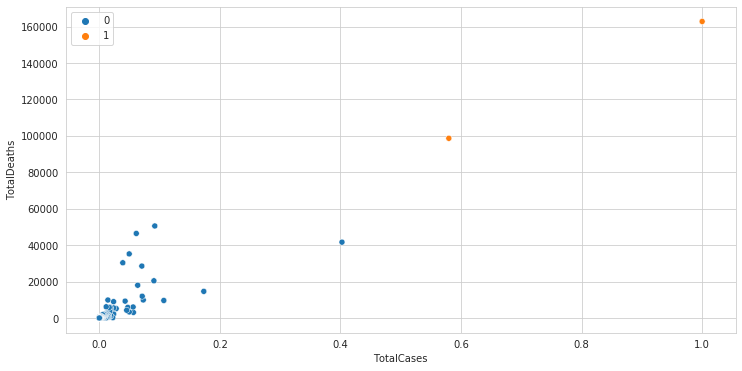

In [50]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="TotalCases", y="TotalDeaths", hue=kmeans6.labels_)

## Calculando a Média

In [11]:
df.mean()

Population          3.041549e+07
TotalCases          9.171850e+04
TotalDeaths         3.792590e+03
TotalRecovered      5.887898e+04
ActiveCases         2.766433e+04
Serious,Critical    5.343934e+02
Tot Cases/1M pop    3.196024e+03
Deaths/1M pop       9.868118e+01
TotalTests          1.402405e+06
Tests/1M pop        8.395937e+04
dtype: float64

## Calculando a Variância

In [12]:
df.var()

Population          1.097594e+16
TotalCases          1.871312e+11
TotalDeaths         2.398529e+08
TotalRecovered      6.589407e+10
ActiveCases         3.049659e+10
Serious,Critical    4.192332e+06
Tot Cases/1M pop    2.695672e+07
Deaths/1M pop       3.060990e+04
TotalTests          3.083988e+13
Tests/1M pop        2.332663e+10
dtype: float64

## Calculando a Mediana

In [13]:
df.median()

Population          7041972.5
TotalCases             4491.0
TotalDeaths             113.0
TotalRecovered         2178.0
ActiveCases             899.0
Serious,Critical         27.5
Tot Cases/1M pop       1015.0
Deaths/1M pop            29.0
TotalTests           135702.0
Tests/1M pop          32585.0
dtype: float64

## Calculando o Desvio Padrão

In [14]:
df.std()

Population          1.047661e+08
TotalCases          4.325867e+05
TotalDeaths         1.548718e+04
TotalRecovered      2.566984e+05
ActiveCases         1.746327e+05
Serious,Critical    2.047519e+03
Tot Cases/1M pop    5.191986e+03
Deaths/1M pop       1.749569e+02
TotalTests          5.553367e+06
Tests/1M pop        1.527306e+05
dtype: float64

## Calculando medidas de dispersão de algumas colunas


In [15]:
df['TotalCases'].describe()

count    2.090000e+02
mean     9.171850e+04
std      4.325867e+05
min      1.000000e+01
25%      7.120000e+02
50%      4.491000e+03
75%      3.689600e+04
max      5.032179e+06
Name: TotalCases, dtype: float64

In [16]:
df['TotalDeaths'].mean()

3792.590425531915

In [17]:
df['TotalDeaths'].median()

113.0

In [18]:
df['TotalDeaths'].mode()

0    1.0
dtype: float64

In [19]:
df['TotalDeaths'].std()

15487.184877168185

## Boxplot de algumas colunas

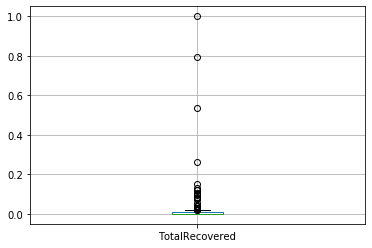

In [20]:
df['TotalRecovered'] = df['TotalRecovered']/max(df['TotalRecovered'])
df.boxplot(column='TotalRecovered')

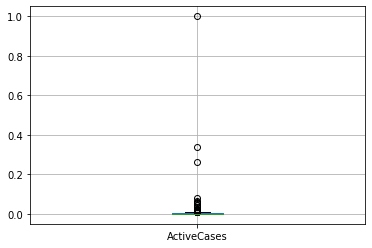

In [21]:
df['ActiveCases'] = df['ActiveCases']/max(df['ActiveCases'])
df.boxplot(column='ActiveCases')

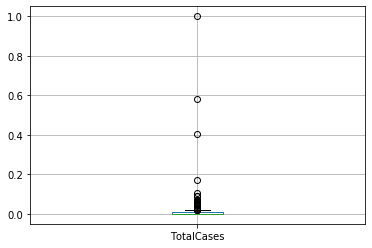

In [22]:
df['TotalCases'] = df['TotalCases']/max(df['TotalCases'])
df.boxplot(column='TotalCases')

## Gráfico dos casos de COVID-19

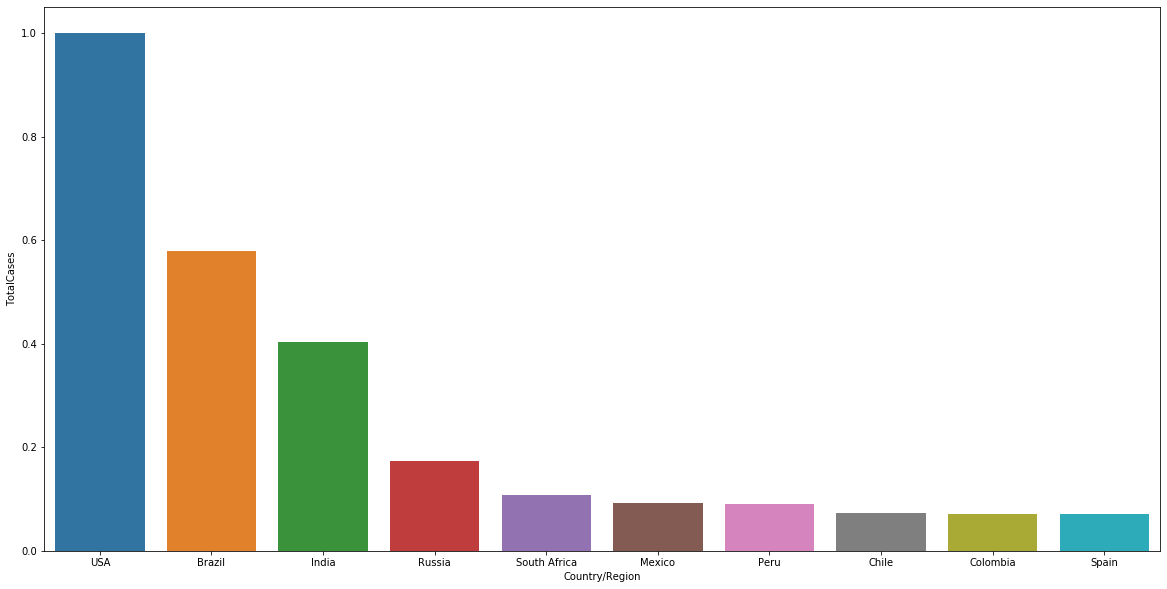

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(data=df[:10], x="Country/Region", y="TotalCases")

## Matriz de correlação das instâncias

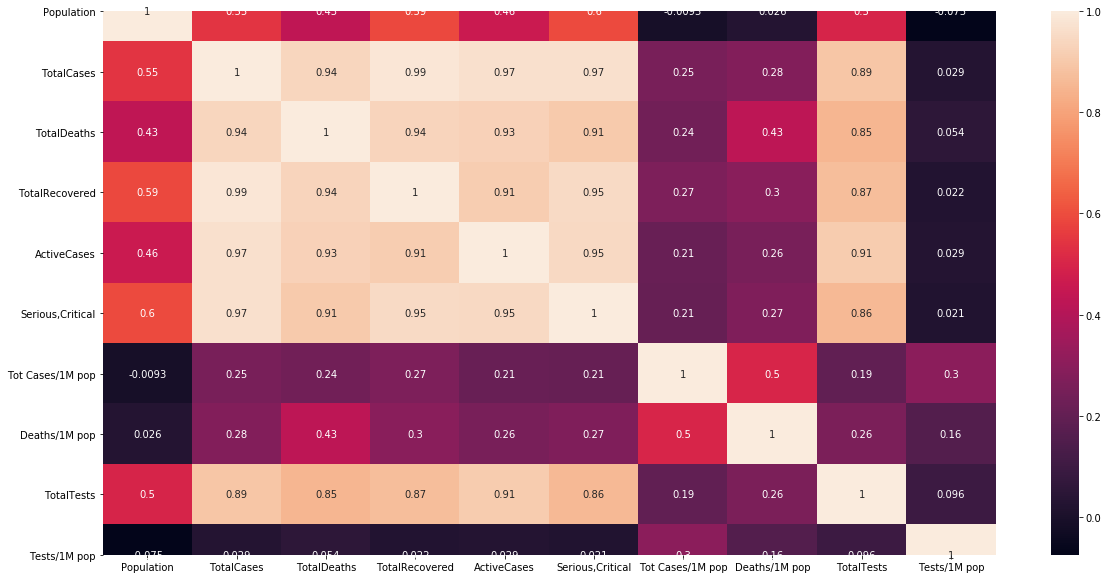

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

## Curva de crescimento dos novos casos do COVID-19

In [25]:
start = 150
limit = 200
plt.figure(figsize=(10,10))
g = sns.lineplot(data=day[start:limit], x="Date", y="New cases", marker="o")
g = g.set_xticklabels(labels=day["Date"][start:limit], rotation=90)

NameError: name 'day' is not defined

<Figure size 720x720 with 0 Axes>

## Gráfico de dispersão

In [ ]:
sns.scatterplot(data=country, x="Deaths", y="Confirmed")